# 로지스틱 회귀 모델로 타이타닉호 생존자 예측하기

### 1. Import library & data

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [80]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

### 2. Check data

In [81]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [82]:
data.shape

(889, 9)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


#### 독립변수: X
1. Pclass: 티켓 클래스
2. Name: 승객 이름
3. Sex: 성별
4. Age: 나이
5. Parch: 함께 탑승한 부모 및 자녀의 수
6. Ticket: 티켓 번호
7. Embarked: 승선한 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

#### 종속변수: y
- Survived: 생존 유무(1 = 생존, 0 = 사망)

In [84]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [85]:
data.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


#### 상관관계의 강도에 대한 일반적인 해석
- 0.2 이하: 상관관계가 거의 없음
- 0.2 ~ 0.4: 낮은 상관관계
- 0.4 ~ 0.6: 중간 수준의 상관관계
- 0.6 ~ 0.8: 높은 상관관계
- 0.8 이상: 매우 높은 상관관계

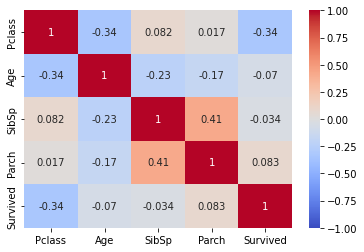

In [86]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)
plt.show()

- Parch와 SibSp가 그나마 상관관계가 높음

### 3. Data preprocessing
- convert categorical data to dummy variable or one hot encoding

- ex: dummy variable(one-hot encoding)
|sex|sex-male|sex-female|
|---|---|---|
|male|1|0|
|male|1|0|
|female|0|1|
|male|1|0|
|female|0|1|

#### 함수 정리
- nunique(): 고윳값의 개수 확인
- get_dummies(): 더미 변수로 변환

In [87]:
# 범주형 변수의 고윳값 개수 확인

data['Name'].nunique() # 변환 부적절, 데이터에서 삭제하는 것이 바람직함

889

In [88]:
# 범주형 변수의 고윳값 개수 확인

data['Sex'].nunique() # 변환 적절

2

In [89]:
# 범주형 변수의 고윳값 개수 확인

data['Ticket'].nunique() # 변환 부적절, 데이터에서 삭제하는 것이 바람직함

680

In [90]:
# 범주형 변수의 고윳값 개수 확인

data['Embarked'].nunique() # 변환 적절

3

In [91]:
# Name과 Ticket 열 전체 삭제

data = data.drop(['Name', 'Ticket'], axis=1)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [92]:
# one-hot encoding using a get_dummies() function in pandas
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'], drop_first = True)

In [93]:
data.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


### 4. Modeling

In [94]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 5. Training

In [95]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 6. Predict

In [96]:
pred = model.predict(X_test)

### 7. Evaluation

In [97]:
f'accuracy score: {accuracy_score(y_test, pred):.4f}'

'accuracy score: 0.7809'

In [98]:
model.coef_

array([[-1.17441965, -0.0435214 , -0.36489057, -0.030929  , -2.63230307,
        -0.07414517, -0.51119837]])

In [99]:
coef = pd.DataFrame(model.coef_[0], columns=['coefficient'])
coef.index = X.columns
coef

,coefficient
Pclass,-1.174420
Age,-0.043521
SibSp,-0.364891
Parch,-0.030929
Sex_male,-2.632303
Embarked_Q,-0.074145
Embarked_S,-0.511198


### 8. Feature Enginnering

In [100]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [101]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
f'accuracy score: {accuracy_score(y_test, pred):.4f}'

'accuracy score: 0.7809'